# TASK 1

In [7]:
import os
import shutil

def copy_files_recursively(src, dest):
    # Ensure destination directory exists
    if not os.path.exists(dest):
        os.makedirs(dest)

    # Iterate through all items in the source directory
    for item in os.listdir(src):
        src_path = os.path.join(src, item)
        if os.path.isdir(src_path):
            # If the item is a directory, recursively copy its contents
            new_dest = os.path.join(dest, item)
            copy_files_recursively(src_path, new_dest)
        else:
            # If the item is a file, copy it to the appropriate subdirectory in the destination
            file_extension = os.path.splitext(item)[1][1:]  # Get file extension without dot
            subdirectory = os.path.join(dest, file_extension)
            if not os.path.exists(subdirectory):
                os.makedirs(subdirectory)
            shutil.copy2(src_path, subdirectory)

def main():
    # Define source and destination directories here
    src = 'path_to_source_directory'  # Replace with your source directory
    dest = 'dist'  # Replace with your destination directory

    try:
        copy_files_recursively(src, dest)
        print("Files copied and sorted successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


An error occurred: [Errno 2] No such file or directory: 'path_to_source_directory'


# TASK 2

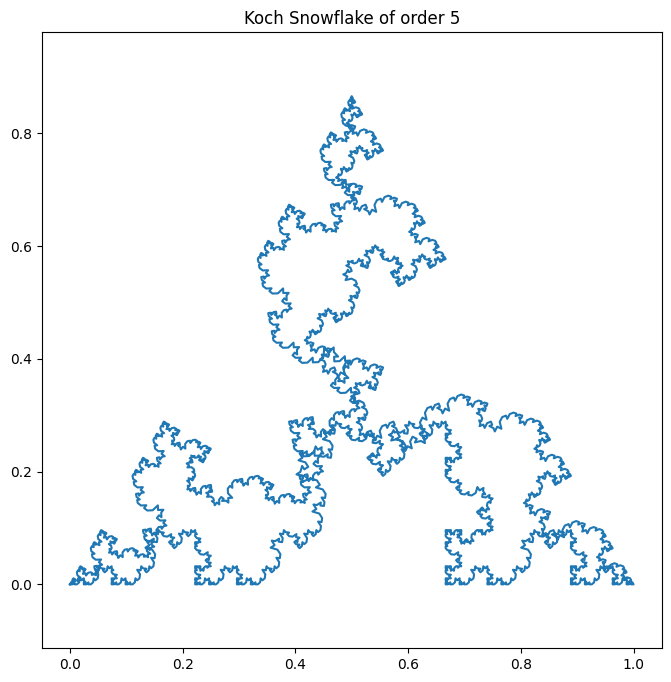

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10):
    def koch_snowflake_complex(order):
        if order == 0:
            return np.array([0 + 0j, 1 + 0j, 0.5 + np.sqrt(3) / 2 * 1j, 0 + 0j])
        else:
            z = koch_snowflake_complex(order - 1)
            w = np.zeros(len(z) * 4 - 3, dtype=np.complex_)
            w[::4] = z
            w[1::4] = z[:-1] + (z[1:] - z[:-1]) / 3
            w[2::4] = z[:-1] + (z[1:] - z[:-1]) / 2 + (z[1:] - z[:-1]) * np.exp(np.pi / 3 * 1j) / 3
            w[3::4] = z[:-1] + 2 * (z[1:] - z[:-1]) / 3
            return w

    points = koch_snowflake_complex(order)
    plt.figure(figsize=(8, 8))
    plt.plot(points.real, points.imag)
    plt.title(f'Koch Snowflake of order {order}')
    plt.axis('equal')
    plt.show()

# Define the recursion level
level = 5  # Change this value to the desired recursion level

# Draw the Koch snowflake
koch_snowflake(level)
